authors: [Ali Ismail-Fawaz](https://hadifawaz1999.github.io/) and [Germain Forestier](https://germain-forestier.info/)

# **Gradient Descent**

Import packages used

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

## Downloading the dataset

In [25]:
!wget https://hadifawaz1999.github.io/teaching/Ensisa/2A-Info/DeepLearning/datasets/pokemon-stats-data.csv

--2024-02-15 18:10:24--  https://hadifawaz1999.github.io/teaching/Ensisa/2A-Info/DeepLearning/datasets/pokemon-stats-data.csv
Resolving hadifawaz1999.github.io (hadifawaz1999.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to hadifawaz1999.github.io (hadifawaz1999.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22598 (22K) [text/csv]
Saving to: ‘pokemon-stats-data.csv.1’

pokemon-stats-data. 100%[===================>]  22.07K  --.-KB/s    in 0.002s  

2024-02-15 18:10:24 (12.8 MB/s) - ‘pokemon-stats-data.csv.1’ saved [22598/22598]



## Reading the data

In [26]:
df = pd.read_csv("pokemon-stats-data.csv")

df = df.dropna()
df.head()

,name,weight_kg,speed,sp_attack,sp_defense,type
0,Bulbasaur,6.9,45,65,65,grass
1,Ivysaur,13.0,60,80,80,grass
2,Venusaur,100.0,80,122,120,grass
3,Charmander,8.5,65,60,50,fire
4,Charmeleon,19.0,80,80,65,fire


## Extract the features to be used

In [27]:
X = np.asarray(df[["weight_kg","sp_attack"]], dtype=np.float32)
Y = np.asarray(df["sp_defense"], dtype=np.float32)

print("Number of samples in the dataset is "+str(len(X)))

Number of samples in the dataset is 781


## Split the dataset into train and test sets

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=33/100, random_state=42)

print("Number of training examples is "+str(len(xtrain)))
print("Number of testing examples is "+str(len(xtest)))

Number of training examples is 523
Number of testing examples is 258


## Normalize the dataset

In [29]:
xtrain = MinMaxScaler().fit_transform(xtrain)
xtest = MinMaxScaler().fit_transform(xtest)

## Create using Tensorflow-Keras a linear model

### Create an input layer with the same shape as one example in xtrain

In [30]:
input_shape = xtrain.shape[1:]

input_layer = tf.keras.layers.Input(input_shape)

### Create an output layer containing one unit (neuron) with linear activation that takes as input the `input_layer` just created

In [31]:
output_layer = tf.keras.layers.Dense(units=1, activation="linear")(input_layer)

### Create the model (a perceptron)

In [32]:
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Choose the optimiazation algorithm and set the learning rate to $0.1$

In [33]:
learning_rate = 0.1
optimizer_algo = tf.keras.optimizers.SGD(learning_rate=learning_rate)

### Choose the cost function to optimize: `Mean Squared Error`

In [34]:
cost_function = tf.keras.losses.mean_squared_error

### Compile the model

In [35]:
model.compile(loss=cost_function, optimizer=optimizer_algo)

### Train the model with a `batch size` of $32$ for $100$ epochs

In [36]:
mini_batch_size = 64
nb_epochs = 500

tf.random.set_seed(42)

history = model.fit(xtrain,
                    ytrain,
                    batch_size=mini_batch_size,
                    epochs=nb_epochs,
                    verbose=0,)

### Plot the error changing with each epoch on the training set

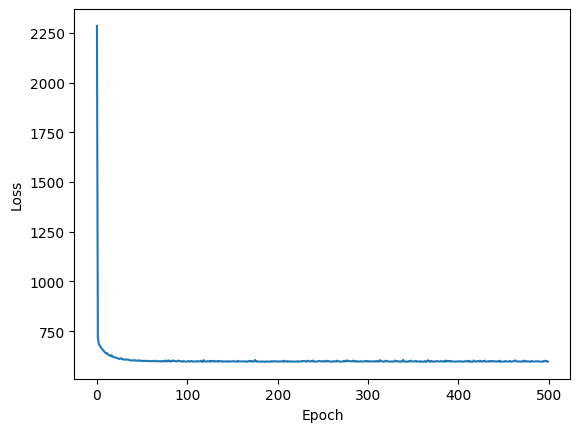

In [37]:
history_dict = history.history
loss_epochs = history_dict["loss"]

plt.figure()
plt.plot(loss_epochs)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
plt.close()

### Evaluate the model on the train set

In [38]:
loss_train = model.evaluate(xtrain, ytrain, verbose=False)
print("The error on the train set is = "+str(loss_train))

The error on the train set is = 604.7542114257812


## Plot the predictions in the case of a plane

### Plot the training data without the predictions

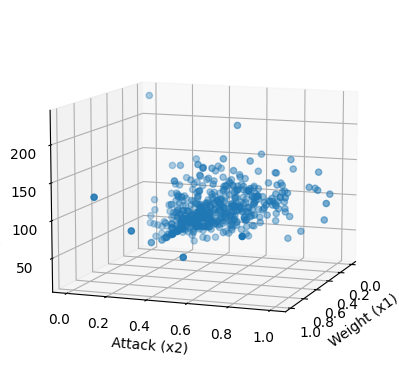

In [39]:
fig = plt.figure()

plot3d = fig.add_subplot(111, projection="3d")

ax = plt.gca()

ax.view_init(elev=10, azim=20)

plot3d.scatter(xtrain[:,0], xtrain[:,1], ytrain)

ax.set_xlabel("Weight (x1)")
ax.set_ylabel("Attack (x2)")
ax.set_zlabel("Defense (y)")

plt.show()
plt.close()

### Recover the learned parameters

In [40]:
learned_parameters = model.layers[-1].get_weights()

w = learned_parameters[0]
b = learned_parameters[1]

print("w = "+str(w))
print("b = "+str(b))

w = [[53.22292]
 [70.1771 ]]
b = [46.74848]


### Plot the decision plane

4/4 [==============================] - 0s 3ms/step


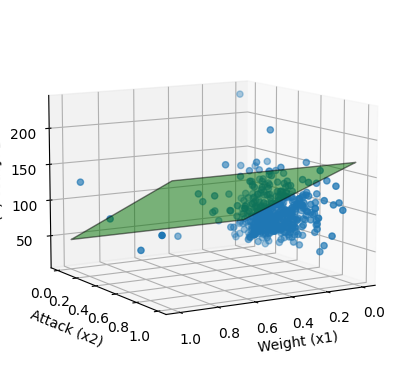

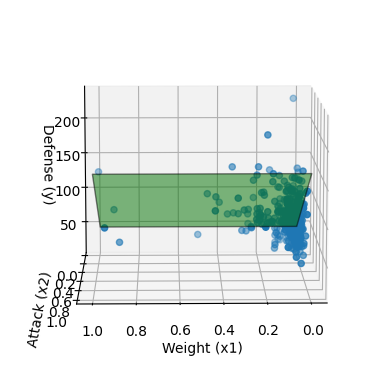

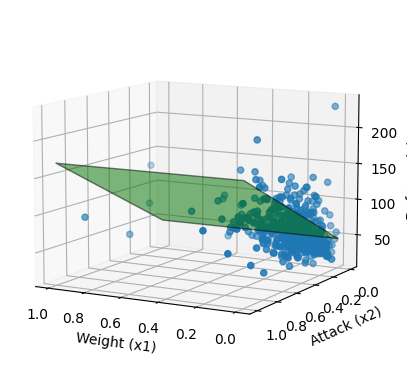

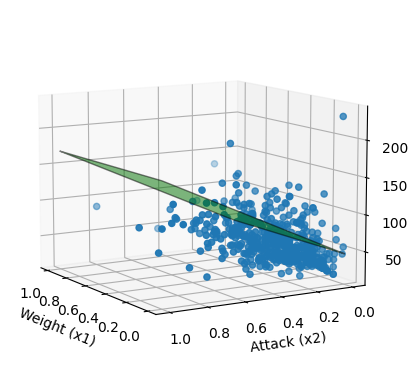

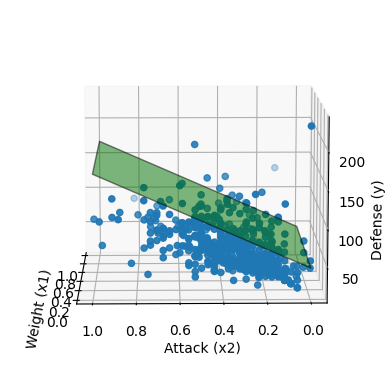

In [41]:
x1_min = xtrain[:,0].min()
x1_max = xtrain[:,0].max()
x2_min = xtrain[:,1].min()
x2_max = xtrain[:,1].max()

nb_points_plane = 100

x1 = np.linspace(start=x1_min, stop=x1_max, num=nb_points_plane)
x1 = x1.reshape(-1,1)
x2 = np.linspace(start=x2_min, stop=x2_max, num=nb_points_plane)
x2 = x2.reshape(-1,1)

X = np.concatenate((x1,x2), axis=1)
ypred = model.predict(X)

Xmesh1, Xmesh2 = np.meshgrid(x1, x2)

for angle in range(59, 180, 30):
  fig = plt.figure()
  plot3d = fig.add_subplot(111, projection="3d")
  ax = plt.gca()

  ax.set_xlabel("Weight (x1)")
  ax.set_ylabel("Attack (x2)")
  ax.set_zlabel("Defense (y)")

  ax.view_init(elev=10, azim=angle)

  plot3d.scatter(xtrain[:,0], xtrain[:,1], ytrain)
  plot3d.plot_surface(Xmesh1, Xmesh2, ypred, color="green", rstride=100, cstride=100, alpha=0.5, edgecolor='black')

# **Exercise**

## Evaluate on the test set

In [42]:
loss_test = model.evaluate(xtest, ytest, verbose=False)
print("The error on test set is = "+str(loss_test))

The error on test set is = 479.65740966796875


## Plot the predicted defense values with respect to the true values of the test set

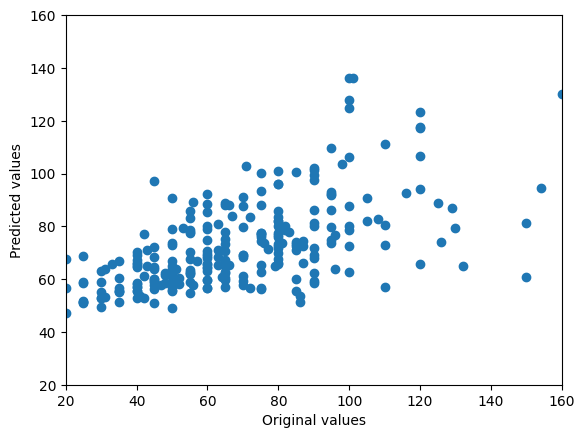

In [43]:
ypred = model.predict(xtest, verbose=False)

min_ypred, max_ypred = np.min(ypred), np.max(ypred)
min_ytest, max_ytest = np.min(ytest), np.max(ytest)

plt.figure()
plt.scatter(ytest, ypred)
plt.xlim(min(min_ypred, min_ytest), max(max_ypred, max_ytest))
plt.ylim(min(min_ypred, min_ytest), max(max_ypred, max_ytest))
plt.xlabel("Original values")
plt.ylabel("Predicted values")
plt.show()
plt.close()

## Train a model while taking 2 attributes (weight and speed) and a non-linear relationship between these 2 attributes

In [44]:
train_product_weight_speed = np.multiply(xtrain[:,0], xtrain[:,1]).reshape(-1,1)
test_product_weight_speed = np.multiply(xtest[:,0], xtest[:,1]).reshape(-1,1)

new_xtrain = np.concatenate((xtrain, train_product_weight_speed), axis=1)
new_xtest = np.concatenate((xtest, test_product_weight_speed), axis=1)

new_xtrain = MinMaxScaler().fit_transform(new_xtrain)
new_xtest = MinMaxScaler().fit_transform(new_xtest)

input_shape = new_xtrain.shape[1:]
input_layer = tf.keras.layers.Input(input_shape)
output_layer = tf.keras.layers.Dense(units=1, activation="linear")(input_layer)

model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
model.summary()

learning_rate = 0.1
optimizer_algo = tf.keras.optimizers.SGD(learning_rate=learning_rate)
cost_function = tf.keras.losses.mean_squared_error

model.compile(loss=cost_function, optimizer=optimizer_algo)

mini_batch_size = 64
nb_epochs = 500
history = model.fit(new_xtrain,
                    ytrain,
                    batch_size=mini_batch_size,
                    epochs=nb_epochs,
                    verbose=False)

loss_train = model.evaluate(new_xtrain, ytrain, verbose=False)
print("The error on the train set is = "+str(loss_train))

loss_test = model.evaluate(new_xtest, ytest, verbose=False)
print("The error on the test set is = "+str(loss_test))

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
The error on the train set is = 597.3469848632812
The error on the test set is = 471.00482177734375


## Plot the predicted values with respect to the real values of the test set

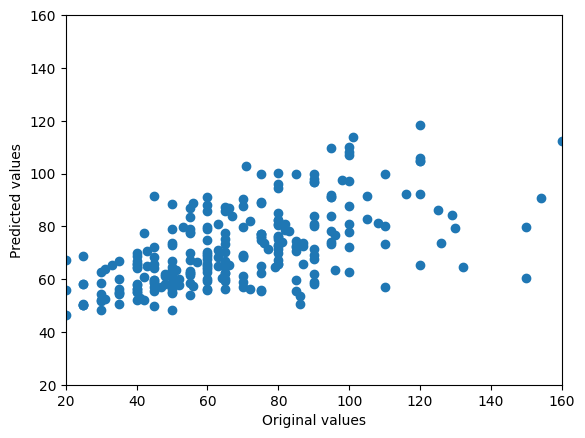

In [45]:
ypred = model.predict(new_xtest, verbose=False)

min_ypred, max_ypred = np.min(ypred), np.max(ypred)
min_ytest, max_ytest = np.min(ytest), np.max(ytest)

plt.figure()
plt.scatter(ytest, ypred)
plt.xlim(min(min_ypred, min_ytest), max(max_ypred, max_ytest))
plt.ylim(min(min_ypred, min_ytest), max(max_ypred, max_ytest))
plt.xlabel("Original values")
plt.ylabel("Predicted values")
plt.show()
plt.close()